In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
df1 = pd.read_csv('Table1.csv')
df2 = pd.read_csv('Table2.csv')
df3 = pd.read_csv('Table3.csv')

In [ ]:
df = pd.merge(df1, pd.merge(df2, df3, on="Sno"), on="Sno")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5347 entries, 0 to 5346
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sno              5347 non-null   int64  
 1   Address          5287 non-null   object 
 2   City             5347 non-null   object 
 3   State code       4085 non-null   object 
 4   Country          5347 non-null   object 
 5   Rental Price     5347 non-null   float64
 6   Deposit          5347 non-null   float64
 7   No of Bed        5347 non-null   int64  
 8   No of Bathroom   5347 non-null   int64  
 9   Area             5347 non-null   float64
 10  Pets Allowed     5347 non-null   object 
 11  Washer/Dryer     5347 non-null   object 
 12  AC               5347 non-null   object 
 13  Parking          5347 non-null   object 
 14  Fireplace        5347 non-null   object 
 15  Dishwasher       5347 non-null   object 
 16  Hardwood Floors  5347 non-null   object 
 17  Roof Deck     

# Correlation of features

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_columns.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                     Sno  Rental Price   Deposit  No of Bed  No of Bathroom  \
Sno             1.000000      0.002991  0.115050  -0.015506        0.142015   
Rental Price    0.002991      1.000000 -0.034692   0.011731        0.008704   
Deposit         0.115050     -0.034692  1.000000   0.111983        0.200079   
No of Bed      -0.015506      0.011731  0.111983   1.000000        0.615030   
No of Bathroom  0.142015      0.008704  0.200079   0.615030        1.000000   
Area            0.103444      0.007359  0.093680   0.277894        0.291636   

                    Area  
Sno             0.103444  
Rental Price    0.007359  
Deposit         0.093680  
No of Bed       0.277894  
No of Bathroom  0.291636  
Area            1.000000  


From the matrix above, we can see that there is a positive correlation between number of beds and number of bathrooms. Which means the rental property which has more beds also have more bathrooms and vice versa.

# Rental Price vs. Area

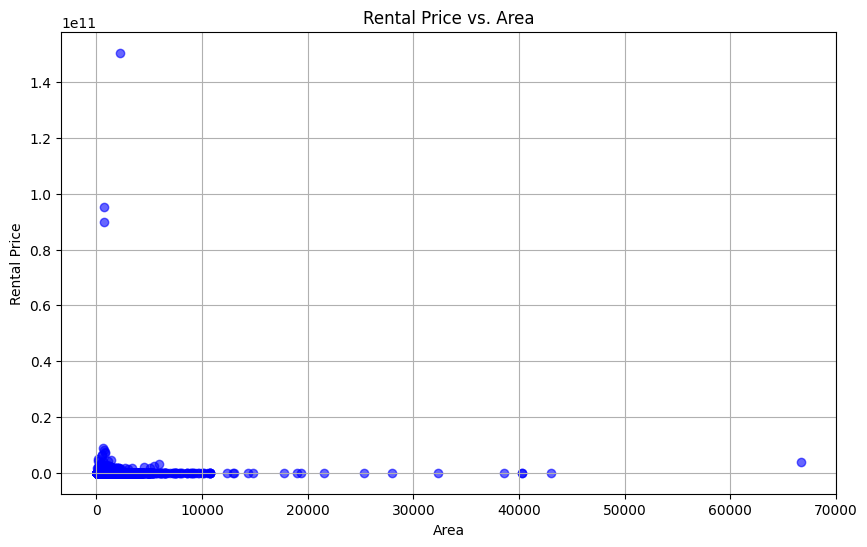

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Area'], df['Rental Price'], color='blue', alpha=0.6)
plt.title('Rental Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Rental Price')
plt.grid(True)
plt.show()

We can see there are around 4 outliers which could affect the performance of model to not generalize well on the majority of properties, lets have a look after removing those outliers.

In [ ]:
def remove_upper_outliers(df, column):
    Q3 = df[column].quantile(0.95)
    upper_bound = Q3 + 1.5 * (Q3 - df[column].quantile(0.25))
    return df[df[column] <= upper_bound]

data_cleaned = remove_upper_outliers(df, 'Area')

data_cleaned = remove_upper_outliers(data_cleaned, 'Rental Price')

6938.0
20313300.0


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5034 entries, 0 to 5346
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sno              5034 non-null   int64  
 1   Address          4998 non-null   object 
 2   City             5034 non-null   object 
 3   State code       3900 non-null   object 
 4   Country          5034 non-null   object 
 5   Rental Price     5034 non-null   float64
 6   Deposit          5034 non-null   float64
 7   No of Bed        5034 non-null   int64  
 8   No of Bathroom   5034 non-null   int64  
 9   Area             5034 non-null   float64
 10  Pets Allowed     5034 non-null   object 
 11  Washer/Dryer     5034 non-null   object 
 12  AC               5034 non-null   object 
 13  Parking          5034 non-null   object 
 14  Fireplace        5034 non-null   object 
 15  Dishwasher       5034 non-null   object 
 16  Hardwood Floors  5034 non-null   object 
 17  Roof Deck     

# Average Rental Price by City

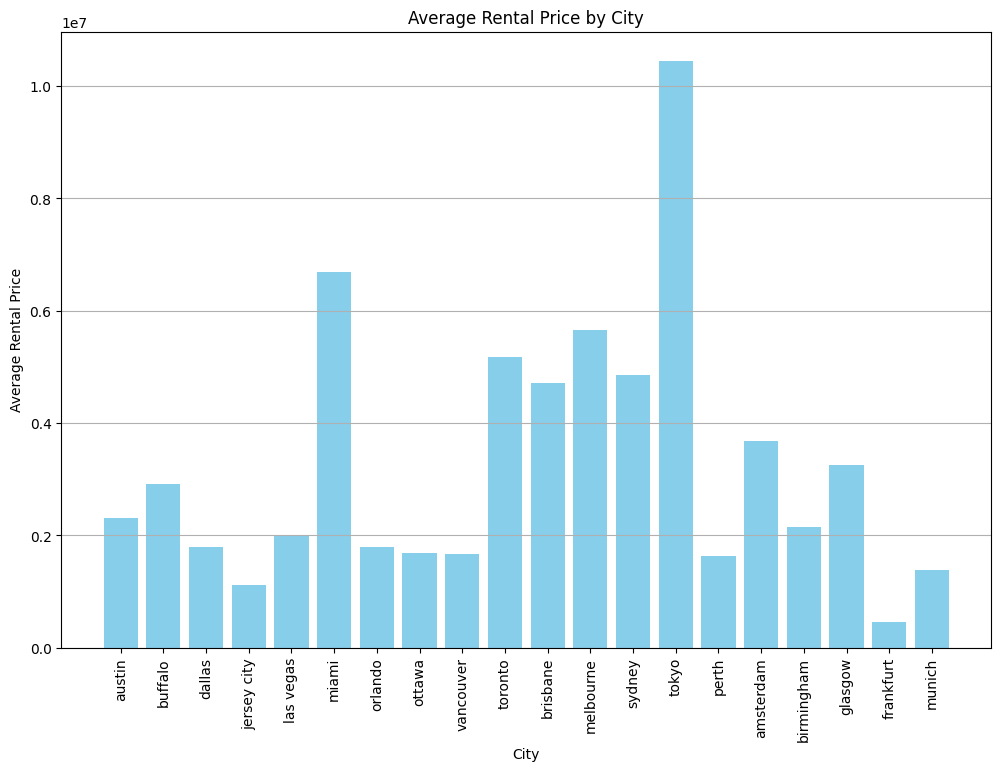

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(data_cleaned['City'], data_cleaned['Rental Price'], color='skyblue')
plt.title('Average Rental Price by City')
plt.xlabel('City')
plt.ylabel('Average Rental Price')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

From the bar graph above, we can see the top 5 cities with the highest average rent in order.

1.   Tokyo
2.   Miami
3.   Melbourne
4.   Toronto
5.   Sydney

and so on.



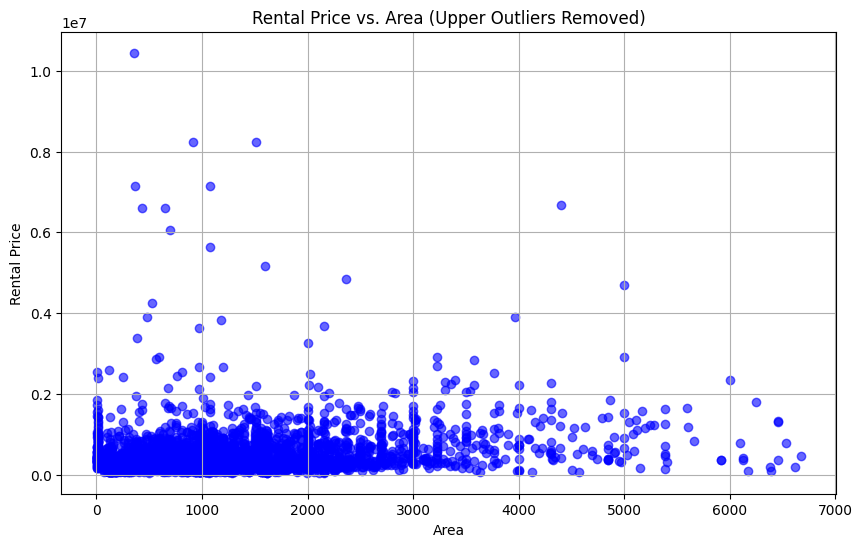

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Area'], data_cleaned['Rental Price'], color='blue', alpha=0.6)
plt.title('Rental Price vs. Area (Upper Outliers Removed)')
plt.xlabel('Area')
plt.ylabel('Rental Price')
plt.grid(True)
plt.show()

# Effect of Categorical features on rent prices

<ipython-input-49-8674a26c79f0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='Rental Price', data=data_cleaned, palette='coolwarm')
<ipython-input-49-8674a26c79f0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='Rental Price', data=data_cleaned, palette='coolwarm')
<ipython-input-49-8674a26c79f0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='Rental Price', data=data_cleaned, palette='coolwarm')
<ipython-input-49-8674a26c79f0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is 

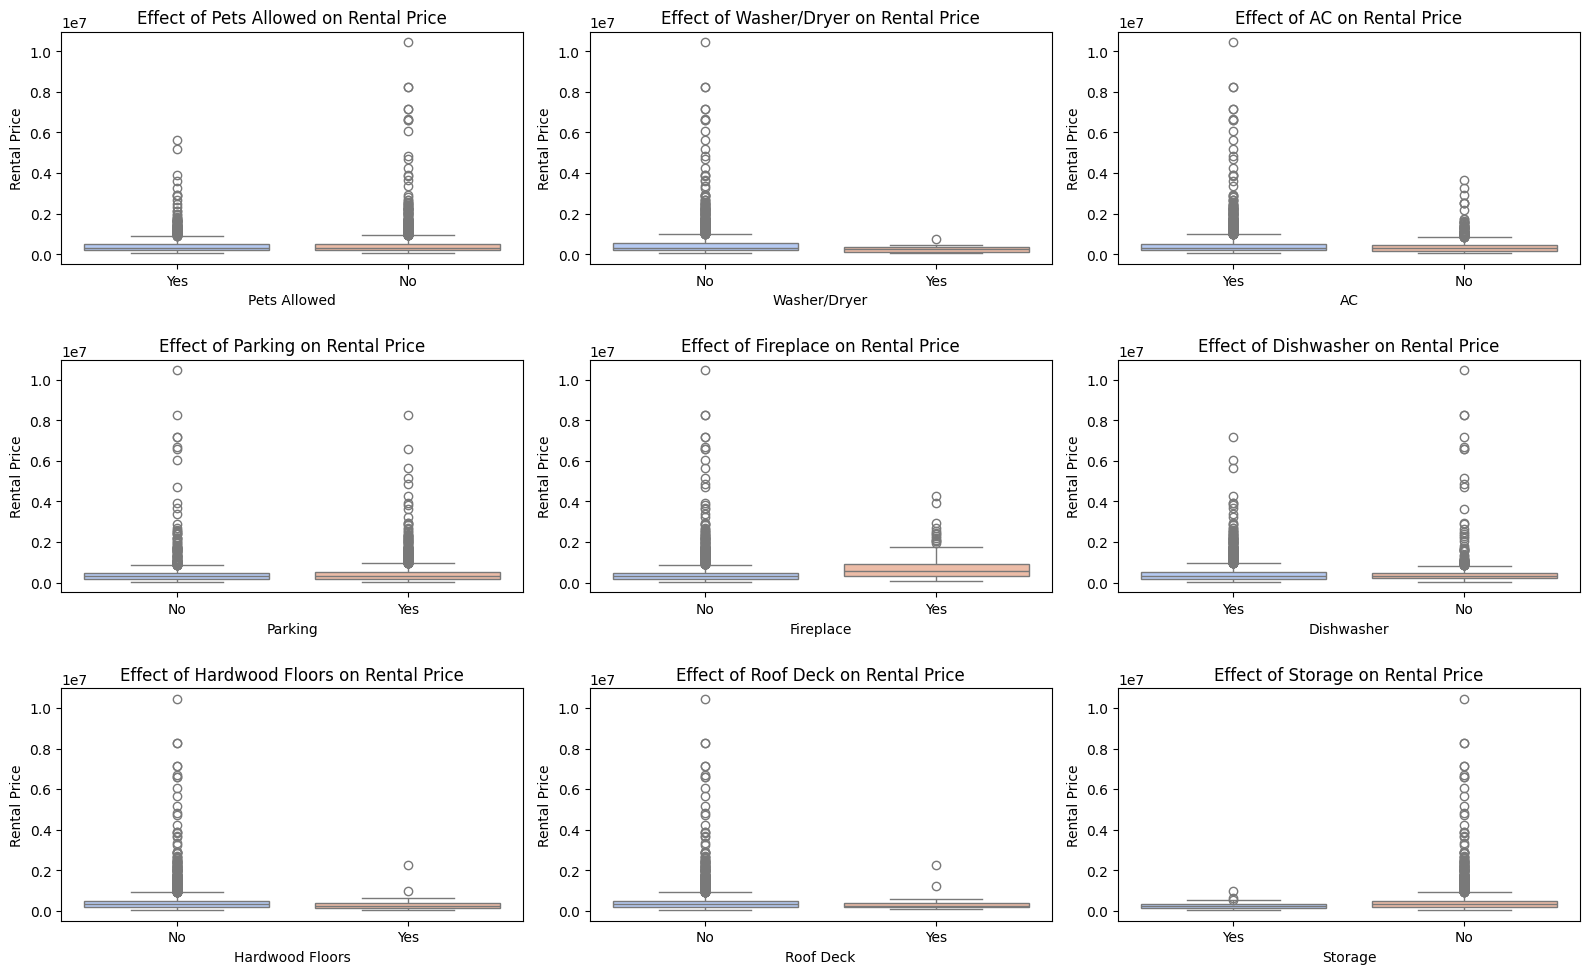

In [ ]:
categorical_variables = ['Pets Allowed', 'Washer/Dryer', 'AC', 'Parking', 'Fireplace', 'Dishwasher', 'Hardwood Floors', 'Roof Deck', 'Storage']

plt.figure(figsize=(16, 10))

for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(3, 3, i)

    sns.boxplot(x=variable, y='Rental Price', data=data_cleaned, palette='coolwarm')
    plt.title('Effect of {} on Rental Price'.format(variable))
    plt.xlabel(variable)
    plt.ylabel('Rental Price')

plt.tight_layout()

plt.show()


We can see while some amnities are contributing to increase in Rental Price, like Fireplace while others don't.

# Model Training

## Preprocessing

In [ ]:
categorical_features = ['Pets Allowed', 'Washer/Dryer', 'AC', 'Parking', 'Fireplace',
                        'Dishwasher', 'Hardwood Floors', 'Roof Deck', 'Storage', 'City', 'Country']
numerical_features = ['Deposit', 'No of Bed', 'No of Bathroom']

target_variable1 = 'Rental Price'
target_variable2 = 'Area'

categorical_transformer = OneHotEncoder(drop='first')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

X = data_cleaned[categorical_features + numerical_features]
y1 = data_cleaned[target_variable1]
y2 = data_cleaned[target_variable2]

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

## Linear Regression model

In [ ]:
model1 = LinearRegression()
model2 = LinearRegression()

pipeline1 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model1)])
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model2)])

pipeline1.fit(X_train, y1_train)
pipeline2.fit(X_train, y2_train)

y1_pred = pipeline1.predict(X_test)
y2_pred = pipeline2.predict(X_test)

rmse1 = mean_squared_error(y1_test, y1_pred, squared=False)
rmse2 = mean_squared_error(y2_test, y2_pred, squared=False)

print("Model 1 (Rental Price prediction) RMSE:", rmse1)
print("Model 2 (Area prediction) RMSE:", rmse2)

Model 1 (Rental Price prediction) RMSE: 458867.5546376715
Model 2 (Area prediction) RMSE: 685.4603019420169


## Decision Tree Regressor

In [ ]:
model1 = DecisionTreeRegressor()
model2 = DecisionTreeRegressor()

pipeline1 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model1)])
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model2)])

pipeline1.fit(X_train, y1_train)
pipeline2.fit(X_train, y2_train)

y1_pred = pipeline1.predict(X_test)
y2_pred = pipeline2.predict(X_test)

rmse1 = mean_squared_error(y1_test, y1_pred, squared=False)
rmse2 = mean_squared_error(y2_test, y2_pred, squared=False)

print("Model 1 (Rental Price prediction) RMSE:", rmse1)
print("Model 2 (Area prediction) RMSE:", rmse2)

Model 1 (Rental Price prediction) RMSE: 449935.1178881941
Model 2 (Area prediction) RMSE: 713.860314649984


## SVMs

In [ ]:
model1 = SVR()
model2 = SVR()

pipeline1 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model1)])
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model2)])

pipeline1.fit(X_train, y1_train)
pipeline2.fit(X_train, y2_train)

y1_pred = pipeline1.predict(X_test)
y2_pred = pipeline2.predict(X_test)

rmse1 = mean_squared_error(y1_test, y1_pred, squared=False)
rmse2 = mean_squared_error(y2_test, y2_pred, squared=False)

print("Model 1 (Rental Price prediction) RMSE:", rmse1)
print("Model 2 (Area prediction) RMSE:", rmse2)

Model 1 (Rental Price prediction) RMSE: 530794.2529796017
Model 2 (Area prediction) RMSE: 858.6974974177074


## Random Forests

In [ ]:
model1 = RandomForestRegressor()
model2 = RandomForestRegressor()

pipeline1 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model1)])
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model2)])

pipeline1.fit(X_train, y1_train)
pipeline2.fit(X_train, y2_train)

y1_pred = pipeline1.predict(X_test)
y2_pred = pipeline2.predict(X_test)

rmse1 = mean_squared_error(y1_test, y1_pred, squared=False)
rmse2 = mean_squared_error(y2_test, y2_pred, squared=False)

print("Model 1 (Rental Price prediction) RMSE:", rmse1)
print("Model 2 (Area prediction) RMSE:", rmse2)

Model 1 (Rental Price prediction) RMSE: 430753.12462577265
Model 2 (Area prediction) RMSE: 682.5543419395387


## Gradient Boosting Machines

In [ ]:
model1 = GradientBoostingRegressor()
model2 = GradientBoostingRegressor()

pipeline1 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model1)])
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model2)])

pipeline1.fit(X_train, y1_train)
pipeline2.fit(X_train, y2_train)

y1_pred = pipeline1.predict(X_test)
y2_pred = pipeline2.predict(X_test)

rmse1 = mean_squared_error(y1_test, y1_pred, squared=False)
rmse2 = mean_squared_error(y2_test, y2_pred, squared=False)

print("Model 1 (Rental Price prediction) RMSE:", rmse1)
print("Model 2 (Area prediction) RMSE:", rmse2)

Model 1 (Rental Price prediction) RMSE: 452307.95077036676
Model 2 (Area prediction) RMSE: 652.9691111581383


## K-Nearest Neighbors (KNN)

In [ ]:
model1 = KNeighborsRegressor()
model2 = KNeighborsRegressor()

pipeline1 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model1)])
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model2)])

pipeline1.fit(X_train, y1_train)
pipeline2.fit(X_train, y2_train)

y1_pred = pipeline1.predict(X_test)
y2_pred = pipeline2.predict(X_test)

rmse1 = mean_squared_error(y1_test, y1_pred, squared=False)
rmse2 = mean_squared_error(y2_test, y2_pred, squared=False)

print("Model 1 (Rental Price prediction) RMSE:", rmse1)
print("Model 2 (Area prediction) RMSE:", rmse2)


Model 1 (Rental Price prediction) RMSE: 445647.4667215399
Model 2 (Area prediction) RMSE: 688.76745102238


## ElasticNet regression

In [ ]:
model1 = ElasticNet()
model2 = ElasticNet()

pipeline1 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model1)])
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model2)])

pipeline1.fit(X_train, y1_train)
pipeline2.fit(X_train, y2_train)

y1_pred = pipeline1.predict(X_test)
y2_pred = pipeline2.predict(X_test)

rmse1 = mean_squared_error(y1_test, y1_pred, squared=False)
rmse2 = mean_squared_error(y2_test, y2_pred, squared=False)

print("Model 1 (Rental Price prediction) RMSE:", rmse1)
print("Model 2 (Area prediction) RMSE:", rmse2)


Model 1 (Rental Price prediction) RMSE: 482108.87190594
Model 2 (Area prediction) RMSE: 713.54786892064


## LightGBM

In [ ]:
param_grid1 = {
    'model__num_leaves': [20, 30, 40],
    'model__max_depth': [5, 10, 15],
    'model__learning_rate': [0.01, 0.1, 0.3],
    'model__min_child_samples': [10, 20, 30],
    'model__subsample': [0.8, 0.9, 1.0]
}

param_grid2 = {
    'model__num_leaves': [20, 30, 40],
    'model__max_depth': [5, 10, 15],
    'model__learning_rate': [0.01, 0.1, 0.3],
    'model__min_child_samples': [10, 20, 30],
    'model__subsample': [0.8, 0.9, 1.0]
}

model1 = LGBMRegressor()
model2 = LGBMRegressor()

pipeline1 = Pipeline([('preprocessor', preprocessor), ('model', model1)])
pipeline2 = Pipeline([('preprocessor', preprocessor), ('model', model2)])

grid_search1 = GridSearchCV(estimator=pipeline1, param_grid=param_grid1, cv=5, scoring='neg_mean_squared_error')
grid_search2 = GridSearchCV(estimator=pipeline2, param_grid=param_grid2, cv=5, scoring='neg_mean_squared_error')

grid_search1.fit(X_train, y1_train)
grid_search2.fit(X_train, y2_train)

best_model1 = grid_search1.best_estimator_
best_model2 = grid_search2.best_estimator_

y1_pred = best_model1.predict(X_test)
y2_pred = best_model2.predict(X_test)

rmse1 = mean_squared_error(y1_test, y1_pred, squared=False)
rmse2 = mean_squared_error(y2_test, y2_pred, squared=False)

print("Model 1 (Rental Price prediction) RMSE:", rmse1)
print("Model 2 (Area prediction) RMSE:", rmse2)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] Number of data points in the train set: 3222, number of used features: 37
[LightGBM] [Info] Start training from score 1104.079329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

## XGBoost

In [ ]:
model1 = XGBRegressor()
model2 = XGBRegressor()

pipeline1 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model1)])
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model2)])

pipeline1.fit(X_train, y1_train)
pipeline2.fit(X_train, y2_train)

y1_pred = pipeline1.predict(X_test)
y2_pred = pipeline2.predict(X_test)

rmse1 = mean_squared_error(y1_test, y1_pred, squared=False)
rmse2 = mean_squared_error(y2_test, y2_pred, squared=False)

print("Model 1 (Rental Price prediction) RMSE:", rmse1)
print("Model 2 (Area prediction) RMSE:", rmse2)


Model 1 (Rental Price prediction) RMSE: 444617.2680240126
Model 2 (Area prediction) RMSE: 659.4826551952651
